In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error#, mean_squared_log_error

%matplotlib inline

In [2]:
df = pd.read_csv("dataset/merged/model3_dataset.csv")
df.dropna(axis=1, how="all", inplace=True)
df["FL_DATE"] = pd.to_datetime(df["FL_DATE"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5518859 entries, 0 to 5518858
Data columns (total 7 columns):
FL_DATE              datetime64[ns]
DAY_OF_WEEK          int64
UNIQUE_CARRIER       object
ORIGIN_AIRPORT_ID    float64
DEP_DELAY            float64
FL_HOUR              int64
DAYS                 float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 294.7+ MB


In [7]:
new_year = datetime.date(2016, 1, 1)
df["DAYS"] = (df["FL_DATE"]-new_year)/ np.timedelta64(1, 'D')

## Cleanup - Outliers

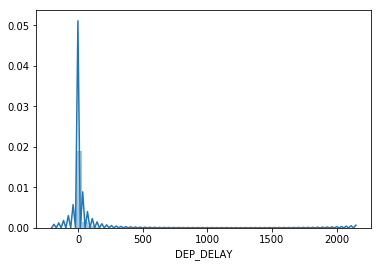

In [5]:
# sns.distplot(df["DEP_DELAY"].dropna(), bins=50)

In [53]:
# for i in range(3):
#     median = df["DEP_DELAY"].median()
#     stdev = df["DEP_DELAY"].std()
#     print("median : {} - Dev : {} ".format(median, stdev))

#     threshold_top = median + 3 * stdev
#     threshold_low = median - 3 * stdev

#     df = df[df["DEP_DELAY"] < threshold_top]
#     df = df[df["DEP_DELAY"] > threshold_low]

median : -2.0 - Dev : 39.8688494878837 
median : -2.0 - Dev : 19.717813607209816 
median : -2.0 - Dev : 12.370780483650675 


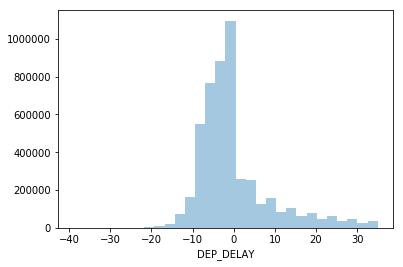

In [62]:
# sns.distplot(df["DEP_DELAY"], bins=30, kde=False)

In [68]:
# df = df.reset_index(drop=True)

In [69]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945620 entries, 0 to 4945619
Data columns (total 7 columns):
FL_DATE              datetime64[ns]
DAY_OF_WEEK          int64
UNIQUE_CARRIER       object
ORIGIN_AIRPORT_ID    float64
DEP_DELAY            float64
FL_HOUR              int64
DAYS                 timedelta64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(1), timedelta64[ns](1)
memory usage: 264.1+ MB


## Recherche de params

In [10]:
df["NB_FLIGHT"] = 0

In [11]:
test = df.groupby(("DAYS", "DAY_OF_WEEK", "FL_HOUR", "UNIQUE_CARRIER", "ORIGIN_AIRPORT_ID")).agg({
    "DEP_DELAY" : "mean",
    "NB_FLIGHT" : "count"
})

In [20]:
test = test.reset_index()

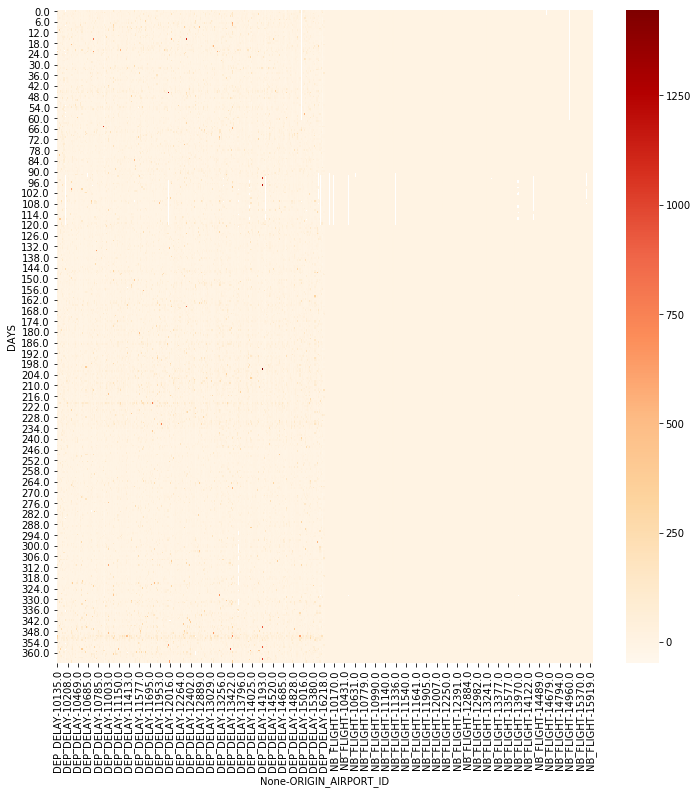

In [14]:
pivoted = test.pivot_table(index='DAYS', columns='ORIGIN_AIRPORT_ID')
plt.figure(figsize=(12,12))
correlation_matrix = pivoted
sns.heatmap(correlation_matrix, cmap="OrRd")
plt.savefig("img/flight_per_day_and_airport.png")
plt.show()

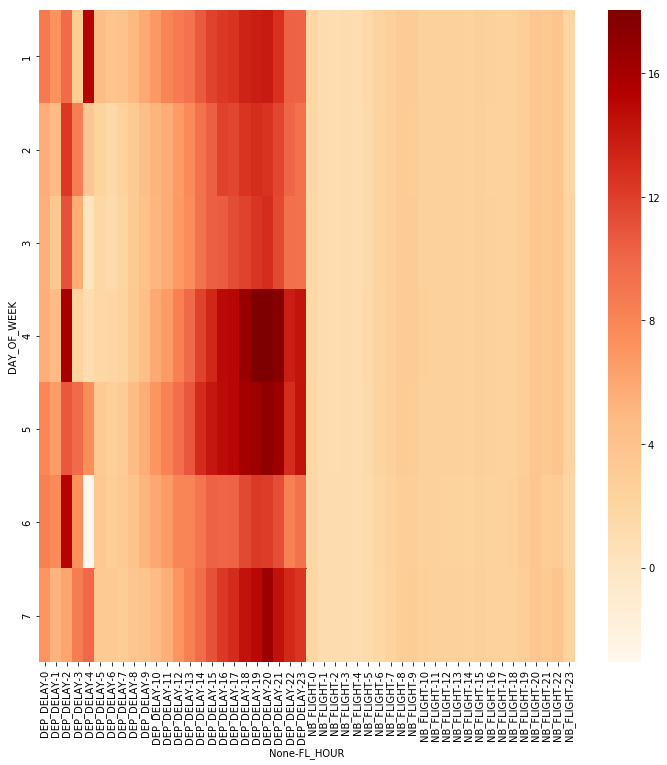

In [16]:
pivoted = test.pivot_table(index='DAY_OF_WEEK', columns='FL_HOUR')
plt.figure(figsize=(12,12))
correlation_matrix = pivoted
sns.heatmap(correlation_matrix, cmap="OrRd")
plt.savefig("img/flight_per_day_and_airport.png")
plt.show()

In [21]:
t_light = test[test["DAYS"] < 30]

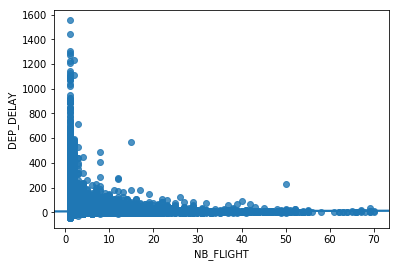

In [22]:
sns.regplot(x="NB_FLIGHT", y="DEP_DELAY", data=t_light)

### Sauvegarde pour test

In [26]:
test

,DAYS,DAY_OF_WEEK,FL_HOUR,UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,DEP_DELAY,NB_FLIGHT
0,0,5,0,AA,12889.0,-3.000000,1
1,0,5,0,AA,12892.0,1.285714,7
2,0,5,0,AA,14107.0,-6.000000,3
3,0,5,0,AA,14747.0,2.000000,1
4,0,5,0,AA,14771.0,-2.500000,2
5,0,5,0,AS,10299.0,-6.000000,2
6,0,5,0,AS,14747.0,-9.000000,1
7,0,5,0,B6,14771.0,-10.000000,1
8,0,5,0,DL,10299.0,-6.000000,1
9,0,5,0,DL,11292.0,-8.000000,1


In [25]:
test["DAYS"] = (test["DAYS"]/7).astype(int)

In [28]:
def Score(x, d):
    if x <= d[0.25]:
        return 0.25
    elif x <= d[0.50]:
        return 0.5
    elif x <= d[0.75]:
        return 0.75
    else:
        return 1

quantiles = test["DEP_DELAY"].quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()
test["RANK"] = test["DEP_DELAY"].apply(Score, args=(quantiles,))
converter = test.set_index('ORIGIN_AIRPORT_ID')["RANK"].to_dict()
df['ORIGIN_AIRPORT_RANK'] = df['ORIGIN_AIRPORT_ID'].apply(lambda x: converter[x])

In [30]:
test = pd.concat([test, pd.get_dummies(df["UNIQUE_CARRIER"])], axis=1)
test = pd.concat([test, pd.get_dummies(df["DAY_OF_WEEK"], prefix="DAY_")], axis=1)
test = pd.concat([test, pd.get_dummies(df["DAYS"], prefix="WEEK_")], axis=1)
test = pd.concat([test, pd.get_dummies(df["ORIGIN_AIRPORT_RANK"], prefix="RANK_")], axis=1)

test.drop(["UNIQUE_CARRIER"], axis=1, inplace = True)
test.drop("DAY_OF_WEEK", axis=1, inplace = True)
test.drop("DAYS", axis=1, inplace = True)
test.drop("ORIGIN_AIRPORT_ID", axis=1, inplace = True)

MemoryError: 

In [ ]:
test.to_csv("../dataset/merged/prod2_dataset.csv", index=False)

## Mise en place dict airport : vol

In [91]:
test = df.groupby(("ORIGIN_AIRPORT_ID")).agg({
    "DEP_DELAY" : "mean",
    "NB_FLIGHT" : "count"
})

In [92]:
test

,DEP_DELAY,NB_FLIGHT
ORIGIN_AIRPORT_ID,,
10135.0,-1.615646,2058
10136.0,-0.921986,141
10140.0,0.231501,17231
10141.0,-2.415473,698
10146.0,-2.374550,833
10154.0,-0.945283,530
10155.0,-3.799047,1259
10157.0,-2.548696,1150
10158.0,-1.143583,3148


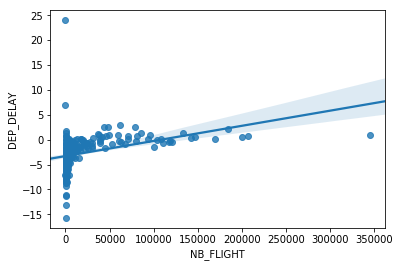

In [93]:
sns.regplot(x="NB_FLIGHT", y="DEP_DELAY", data=test)

In [96]:
df

,FL_DATE,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,DEP_DELAY,FL_HOUR,DAYS,NB_FLIGHT
0,2016-01-06,3,AA,11298.0,-3.0,11,5 days,0
1,2016-01-07,4,AA,11298.0,-4.0,11,6 days,0
2,2016-01-08,5,AA,11298.0,-5.0,11,7 days,0
3,2016-01-09,6,AA,11298.0,2.0,11,8 days,0
4,2016-01-11,1,AA,11298.0,7.0,11,10 days,0
5,2016-01-12,2,AA,11298.0,-1.0,11,11 days,0
6,2016-01-13,3,AA,11298.0,-5.0,11,12 days,0
7,2016-01-14,4,AA,11298.0,-2.0,11,13 days,0
8,2016-01-15,5,AA,11298.0,-4.0,11,14 days,0
9,2016-01-16,6,AA,11298.0,-4.0,11,15 days,0


In [98]:
t2 = df.groupby("ORIGIN_AIRPORT_ID", "FL_HOUR").agg({
    "DEP_DELAY" : "mean",
    "NB_FLIGHT" : "count"
})

ValueError: No axis named FL_HOUR for object type <class 'pandas.core.frame.DataFrame'>

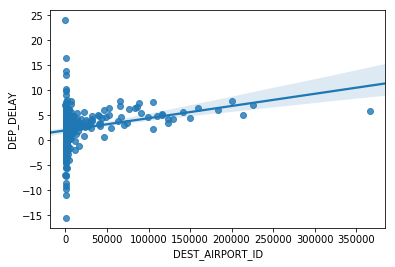

In [28]:
sns.regplot(x="DEST_AIRPORT_ID", y="DEP_DELAY", data=t2)

In [29]:
a = pd.read_csv("dataset/lighted/2016_01_light.csv")

In [30]:
a

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,DISTANCE,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 64
0,1,6,3,2016-01-06,AA,11298,11433,1100,-3.0,1438,-6.0,0.0,0.0,986.0,NaN,NaN,NaN,NaN,NaN
1,1,7,4,2016-01-07,AA,11298,11433,1100,-4.0,1438,-12.0,0.0,0.0,986.0,NaN,NaN,NaN,NaN,NaN
2,1,8,5,2016-01-08,AA,11298,11433,1100,-5.0,1438,7.0,0.0,0.0,986.0,NaN,NaN,NaN,NaN,NaN
3,1,9,6,2016-01-09,AA,11298,11433,1100,2.0,1438,-5.0,0.0,0.0,986.0,NaN,NaN,NaN,NaN,NaN
4,1,10,7,2016-01-10,AA,11298,11433,1100,100.0,1438,113.0,0.0,0.0,986.0,0.0,47.0,0.0,66.0,NaN
5,1,11,1,2016-01-11,AA,11298,11433,1100,7.0,1438,-3.0,0.0,0.0,986.0,NaN,NaN,NaN,NaN,NaN
6,1,12,2,2016-01-12,AA,11298,11433,1100,-1.0,1438,0.0,0.0,0.0,986.0,NaN,NaN,NaN,NaN,NaN
7,1,13,3,2016-01-13,AA,11298,11433,1100,-5.0,1438,-7.0,0.0,0.0,986.0,NaN,NaN,NaN,NaN,NaN
8,1,14,4,2016-01-14,AA,11298,11433,1100,-2.0,1438,-10.0,0.0,0.0,986.0,NaN,NaN,NaN,NaN,NaN
9,1,15,5,2016-01-15,AA,11298,11433,1100,-4.0,1438,-4.0,0.0,0.0,986.0,NaN,NaN,NaN,NaN,NaN


In [31]:
a["FL_DATE"] = pd.to_datetime(a["FL_DATE"])

In [34]:
a

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,DISTANCE,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 64
0,1,6,3,2016-01-06,AA,11298,11433,1100,-3.0,1438,-6.0,0.0,0.0,986.0,NaN,NaN,NaN,NaN,NaN
1,1,7,4,2016-01-07,AA,11298,11433,1100,-4.0,1438,-12.0,0.0,0.0,986.0,NaN,NaN,NaN,NaN,NaN
2,1,8,5,2016-01-08,AA,11298,11433,1100,-5.0,1438,7.0,0.0,0.0,986.0,NaN,NaN,NaN,NaN,NaN
3,1,9,6,2016-01-09,AA,11298,11433,1100,2.0,1438,-5.0,0.0,0.0,986.0,NaN,NaN,NaN,NaN,NaN
4,1,10,7,2016-01-10,AA,11298,11433,1100,100.0,1438,113.0,0.0,0.0,986.0,0.0,47.0,0.0,66.0,NaN
5,1,11,1,2016-01-11,AA,11298,11433,1100,7.0,1438,-3.0,0.0,0.0,986.0,NaN,NaN,NaN,NaN,NaN
6,1,12,2,2016-01-12,AA,11298,11433,1100,-1.0,1438,0.0,0.0,0.0,986.0,NaN,NaN,NaN,NaN,NaN
7,1,13,3,2016-01-13,AA,11298,11433,1100,-5.0,1438,-7.0,0.0,0.0,986.0,NaN,NaN,NaN,NaN,NaN
8,1,14,4,2016-01-14,AA,11298,11433,1100,-2.0,1438,-10.0,0.0,0.0,986.0,NaN,NaN,NaN,NaN,NaN
9,1,15,5,2016-01-15,AA,11298,11433,1100,-4.0,1438,-4.0,0.0,0.0,986.0,NaN,NaN,NaN,NaN,NaN


In [35]:
a["CRS_DEP_TIME"]

0         1100
1         1100
2         1100
3         1100
4         1100
5         1100
6         1100
7         1100
8         1100
9         1100
10        1100
11        1100
12        1100
13        1100
14        1100
15        1100
16        1100
17        1100
18        1100
19        1100
20        1100
21        1100
22        1100
23        1100
24        1100
25        1100
26        1513
27        1513
28        1513
29        1513
          ... 
445797    1925
445798    1620
445799    1035
445800    1710
445801    1900
445802    1305
445803    1055
445804    1950
445805    1045
445806    1435
445807    2020
445808     845
445809    2125
445810     735
445811    1615
445812    1340
445813    1155
445814    1830
445815     850
445816    1740
445817     715
445818    1700
445819    1515
445820     925
445821    1135
445822    1305
445823    1930
445824     750
445825    1430
445826    1045
Name: CRS_DEP_TIME, Length: 445827, dtype: int64